# **Sentiment Analysis of Oil & Gas Supermajors**

## 01.- Definition:
- In essence, it is the process of determining the emotional tone behind a series of words, used to gain an understanding of the the attitudes, opinions and emotions expressed within an online mention. (Kristian Bannister - Senior Marketing Manager)

- It is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral. (Peter Nagy - Kaggle)

## 02.- Objective:
- to gain an overview of a wider public opinion behind the oil & gas market and how is seen by the supermajors and the specialists, investors and  journalists dedicated to the energy market.

## 03.- Relevance:

- Shifts in sentiment on social media have been shown to correlate with shifts in the stock market.<p>
- We take all the words and phrases that imply positive or negative sentiment and apply rules that consider how context might affect the tone of the content.<p>
- Carefully crafted rules help the software know when a sentence is positive or negative; neutral sentences will be considered when substracting all positive and negative sentiments from the entire dataset.

> -----

## 04.1.- Generic Workflow for Predicting Sentiment
The following diagram shows a general overview of the approach we will use for this modeling problem. The Tweets from Market Analysts and Investing Advisors will be used on the dataset for Training and Testing. The expressed sentiment will be the target column obtained using the textblob library.

In a second approach we will be using the model with all sentiment validated in a LSTM Deep Neural Network to see how the network is able to predict new samples (now from the tweets of the Super Majors) to predict its sentiment attitude.

![Sentiment Analysis - Generic Workflow](images/generic_workflow.jpg "Sentiment Analysis")

## 04.2.- References:
1 - [Twitter Analysis with Python](https://datascienceplus.com/twitter-analysis-with-python/)</p>
2 - [Mining Twitter Data with Python](https://marcobonzanini.com/2015/05/17/mining-twitter-data-with-python-part-6-sentiment-analysis-basics/)</p>
3 - [Basic data analysis on Twitter with Python](https://medium.freecodecamp.org/basic-data-analysis-on-twitter-with-python-251c2a85062e)</p>
4 - [Twitter Sentiment Analysis using Python](https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/)</p>
5 - [Sentiment detection with Keras, word embeddings and LSTM deep learning networks](https://www.liip.ch/en/blog/sentiment-detection-with-keras-word-embeddings-and-lstm-deep-learning-networks)</p>
6 - [models.word2vec – Word2vec embeddings](https://radimrehurek.com/gensim/models/word2vec.html)</p>
7 - [Sense2Vec with SpaCy and Gensim](https://explosion.ai/blog/sense2vec-with-spacy)</p>
8 - [Learn Word2Vec by implementing it in tensorflow](https://towardsdatascience.com/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac)</p>
9 - [Pre-trained word embeddings](https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py)</p>
10 - [Application Management with Twitter API](https://apps.twitter.com/)</p>
11 - [Support on Python Syntax and Examples](https://stackoverflow.com/)</p>
12 - [Word2Vec Tutorial - The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)</p>
13 - [Representing Words](http://veredshwartz.blogspot.com/2016/01/representing-words.html)</p>
14 - [How to Use Word Embeddings Layers for Deep Learning with Keras](https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/)</p>
15 - [Using pre-trained word embeddings in a Keras model](https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html)</p>
16 - [Word2Vec with Tensorflow](https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/nlp/word2vec_tensorflow.ipynb)</p>
17 - [Understanding Sentiment Analysis: What It Is & Why It’s Used](https://www.brandwatch.com/blog/understanding-sentiment-analysis/)</p>
18 - [Sentiment Analysis on the First Republic Party debate in 2016](https://github.com/nagypeterjob/Sentiment-Analysis-NLTK-ML-LSTM)</p>
19 - [Getting Started with Sentiment Analysis](https://nlpforhackers.io/sentiment-analysis-intro/)</p>
20 - [Sentiment detection with Keras, word embeddings and LSTM deep learning networks](https://www.liip.ch/en/blog/sentiment-detection-with-keras-word-embeddings-and-lstm-deep-learning-networks)</p>

## 05.- Installing and Importing key Libraries

In [1]:
# Import the necessary libraies and methods
import json
import numpy as np
import pandas as pd
import re
import warnings

# import Variables that contains the user credentials to access Twitter API
from twitter_authentication import API_KEY, API_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET

# tweepy is the python client for the official Twitter API
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API
from tweepy import TweepError

# textblob is the python library for sentiment analysis
from textblob import TextBlob

# Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

# wordcloud is a python library for printing a cloud of words
from wordcloud import WordCloud, STOPWORDS

# nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

# keras
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

# set the matplotlib style
matplotlib.style.use('ggplot')

Using TensorFlow backend.


## 06.- Suggested List of Tweets Tags -- Including supermajors and energy analysts

In [2]:
#This line filter Twitter Streams to capture data by the keywords included in TAGS variable
TAGS = ['@PetroleumEcon', '@IHSMarkit', '@PWYPUSA', '@SPGlobalRatings', 
        '@energyintel', '@michaelkamon', '@pvmagazineusa', '@mwtnews', 
        '@NRGInstitute', '@WorldOil', '@robinenergy', '@PortXLglobal', 
        '@UpstreamOnline', '@greentechmedia', '@PlattsOil', '@AyataAnalytics', 
        '@OilandGasIQ', '@oil_recruitment', '@Gaurav81184', '@ReemaHarfoushi', 
        '@EIAgov', '@tfoxlaw', '@tapmanagement', '@boonepickens', 
        '@EmilyPickrell', '@Chevron', '@IERenergy', '@TheOilDrum', 
        '@FPSONetwork', '@GregorMacdonald', '@lauraelkatiri', '@StollmeyerEU', 
        '@EamonRyan', '@colinbaines1', '@sustainable2050', '@VanderHoevenn_M', 
        '@JSG2050', '@KateTCPA', '@Isadora_Wronski', '@EnergyInnovLLC', 
        '@ENERGY', '@Schuldensuehner', '@vtchacarova', '@Chris1reuters', 
        '@alexanderYf', '@HenrikZeberg', '@World_Oil_Price', '@DrBailey_Petro', 
        '@OilsandsEditor', '@Shell_NatGas', '@iraqoilreport', '@jpolson9', 
        '@BloombergNRG', '@oilandgasnews', '@OilGasMalaysia', '@UKERCHQ', 
        '@OilGasCanada', '@ooga_hq', '@OilandGasInvest', '@robinenergy', 
        '@derek_brower', '@theoilprice', '@stevelevine', '@marcellusmin', 
        '@AmyAHarder', '@saeverley', '@davidshellblog', '@KateGalbraith', 
        '@oilandgasuk', '@TerryMac999', '@BP_America', '@RigData', 
        '@LaOilGasAssoc', '@Shell', '@BGGroup', '@nelderini', 
        '@PatrickOsgood', '@JonathanFahey', '@wenkennedy', '@psdvi', 
        '@EnergyInDepth', '@exxonmobil', '@twitoil', '@Saudi_Aramco', 
        '@Total', '@offshoremgzn', '@Chevron', '@OGJOnline', 
        '@OilVoice', '@BP_plc', '@Rigzone', '@UpstreamOnline', 
        '@OilandGasIQ', '@WorldOil', '@worldoilngas', '@ExxonMobil', 
        '@ExxonMobil_UK', '@ExxonMobil_EU', '@ExxonMobil_NG', '@ExxonMobil_ID', 
        '@exxonmobil_qa', '@exxonmobil_aus', '@ExxonMobil_AK', '@Shell', 
        '@Shell_UKLtd', '@Shell_US', '@Shell_Canada', '@Shell_Nigeria', 
        '@Shell_India', '@eni', '@BP_UK', '@2020Upstream']

# sort a list
def sortList(list):
    return list.sort(key=str.lower)

# set to lower case elements in a list
def lcase(list):
    l = [a.lower() for a in list]
    return l

# remove duplicates in a list
def remove_dup_inlist(onelist):
    return list(set(onelist))

TAGS = lcase(TAGS)
TAGS = remove_dup_inlist(TAGS)
sortList(TAGS)

print((len(TAGS), TAGS))

(105, ['@2020upstream', '@alexanderyf', '@amyaharder', '@ayataanalytics', '@bggroup', '@bloombergnrg', '@boonepickens', '@bp_america', '@bp_plc', '@bp_uk', '@chevron', '@chris1reuters', '@colinbaines1', '@davidshellblog', '@derek_brower', '@drbailey_petro', '@eamonryan', '@eiagov', '@emilypickrell', '@energy', '@energyindepth', '@energyinnovllc', '@energyintel', '@eni', '@exxonmobil', '@exxonmobil_ak', '@exxonmobil_aus', '@exxonmobil_eu', '@exxonmobil_id', '@exxonmobil_ng', '@exxonmobil_qa', '@exxonmobil_uk', '@fpsonetwork', '@gaurav81184', '@greentechmedia', '@gregormacdonald', '@henrikzeberg', '@ierenergy', '@ihsmarkit', '@iraqoilreport', '@isadora_wronski', '@jonathanfahey', '@jpolson9', '@jsg2050', '@kategalbraith', '@katetcpa', '@laoilgasassoc', '@lauraelkatiri', '@marcellusmin', '@michaelkamon', '@mwtnews', '@nelderini', '@nrginstitute', '@offshoremgzn', '@ogjonline', '@oil_recruitment', '@oilandgasinvest', '@oilandgasiq', '@oilandgasnews', '@oilandgasuk', '@oilgascanada', '@oilg

## 07.- Twitter API Authentication

In [3]:
# this handles Twitter authentication -- see reference 10 for details
auth = OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = API(auth, wait_on_rate_limit=True)   # it will wait instead of failing, when rate limit is reached

In [4]:
MAX_TWEETS = 100
LANG = 'en'

## 08.- Useful functions to modularize the code

In [14]:
# clean tweet from unnecessary characters -- needs further polish
def clean_tweet(tweet_text):
    data = pd.DataFrame([], columns=['text'], index=[0])
    data.iloc[0] = tweet_text
    data.iloc[0] = data.iloc[0].apply(lambda x: re.sub('RT\s\@[a-zA-Z0-9]*\:\s', '', x)) # eliminating 'RT ' from the tweets
    data.iloc[0] = data.iloc[0].apply(lambda x: x.lower())
    data.iloc[0] = data.iloc[0].apply(lambda x: re.sub('\n', '', x))
    data.iloc[0] = data.iloc[0].apply(lambda x: re.sub('(http|https)\:\/{2}[a-zA-Z0-9\-\.\/]*', '', x))
    data.iloc[0] = data.iloc[0].apply(lambda x: re.sub('(\#|\@)[a-zA-Z0-9]*', '', x))    
    data.iloc[0] = data.iloc[0].apply(lambda x: re.sub('\srt\s', '', x))
    data.iloc[0] = data.iloc[0].apply((lambda x: re.sub('^a-zA-Z0-9\s','',x)))
    
    return data.iloc[0]['text'].strip()

In [15]:
# quality tweet sentiment based on textblob library
# Other libraries are also useful for this like NLTK, and LSTM with Tensorflow (more complicated)
def get_tweet_sentiment(clean_tweet_text):
    # get sentiment from a tweet 'text'
    analysis = TextBlob(clean_tweet_text)
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# get tweets based on a particular tag and store them in a list
def get_tweets(query, max_tweets = 10, lang='en'):
    try:
        # call twitter api to fetch tweets
        fetched_tweets = api.search(q = query, count = max_tweets, lang=lang)
        # parsing tweets one by one
        for tweet in fetched_tweets:
            
            # empty dictionary to store required params of a tweet
            parsed_tweet = {}

            # saving a clean text of tweet
            parsed_tweet['text'] = clean_tweet(tweet.text)
            
            # saving sentiment of tweet
            parsed_tweet['sentiment'] = get_tweet_sentiment(parsed_tweet['text'])

            # appending parsed tweet to tweets list
            if tweet.retweet_count > 0:
                # if tweet has retweets, ensure that it is appended only once
                if parsed_tweet not in tweets:
                    tweets.append(parsed_tweet)
            else:
                tweets.append(parsed_tweet)
        # return parsed tweets
        return tweets
    except TweepError as e:
        # print error (if any)
        print("Error : " + str(e))

## 09.- Pull all tags on list TAGS

In [ ]:
pd.set_option('display.line_width', 1200)
pd.set_option('display.max_colwidth', -1)
# initialize list of tweets
tweets = []
# get all tweets from the list of TAGS
for i, tag in enumerate(TAGS):
    tweets = get_tweets(query = tag, max_tweets = MAX_TWEETS)

In [17]:
df_tweets = pd.DataFrame(data=tweets, columns=['sentiment', 'text']).drop_duplicates()

In [18]:
df_tweets.head()

,sentiment,text
0,negative,"always gets crushed leading into the us open. seems to be a pastime hobby for americans,…"
1,neutral,the system has been designed to keep prices low so that this bubble economy can stay…
2,neutral,can't wait!
3,neutral,"trump, the fed and the rest of the crew. their specialty is getting market to move on nothing but noi…"
4,positive,no amount of trade talks in any reasonable time period is going to make up for the us net…


In [19]:
print("Positive Tweets: {}".format(df_tweets[ df_tweets['sentiment'] == 'positive'].shape[0]))
print("Negative Tweets: {}".format(df_tweets[ df_tweets['sentiment'] == 'negative'].shape[0]))
print("Neutral  Tweets: {}".format(df_tweets[ df_tweets['sentiment'] == 'neutral'].shape[0]))

Positive Tweets: 1154
Negative Tweets: 420
Neutral  Tweets: 1368


## 10.- Summarize sentiment on tweets and Report

In [ ]:
# picking positive tweets from tweets
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
# percentage of positive tweets
print("Positive tweets percentage: {}".format(100*len(ptweets)/len(tweets)))
# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
# percentage of negative tweets
print("Negative tweets percentage: {}".format(100*len(ntweets)/len(tweets)))
# percentage of neutral tweets
print("Neutral tweets percentage: {}".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))

# printing first 5 positive tweets
print("\n\n======================================================")
print("total positive tweets={}".format(len(ptweets)))
print("(first 5) Positive tweets:")
for tweet in ptweets[:5]:
    print(tweet['text'])

# printing first 5 negative tweets
print("\n\n======================================================")
print("total negative tweets={}".format(len(ntweets)))
print("(first 5) Negative tweets:")
for tweet in ntweets[:5]:
    print(tweet['text'])


## 11.- Visualization of Results

In [ ]:
# visualization with wordcloud
def wordcloud(tweets, col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width=1600, height=800, 
                          background_color="white", 
                          stopwords=stopwords, 
                          random_state = 123).generate(" ".join([t for t in tweets[col]]))
    plt.figure(figsize=(20,10), facecolor='k')
    plt.title("Common Words on Tweets of Oil & Gas SuperMajors")
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

### 11.1- Visualizing most common words in a cloud 

In [ ]:
wordcloud(df_tweets, 'text')

### 11.2- Visualizing most common sentiment present in the tweets

In [ ]:
wordcloud(df_tweets, 'sentiment')

In [21]:
# define the number of max features as 1000 and use Tokenizer to vectorize and convert text into Sequences so the network can deal with it as input.
max_features = 1000
# keras.preprocessing.text.Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~ ', 
#                                    lower=True, split=' ', char_level=False, oov_token=None)
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df_tweets['text'])
X = tokenizer.texts_to_sequences(df_tweets['text'])
X = pad_sequences(X)

In [22]:
df_tweets.head()

,sentiment,text
0,negative,"always gets crushed leading into the us open. seems to be a pastime hobby for americans,…"
1,neutral,the system has been designed to keep prices low so that this bubble economy can stay…
2,neutral,can't wait!
3,neutral,"trump, the fed and the rest of the crew. their specialty is getting market to move on nothing but noi…"
4,positive,no amount of trade talks in any reasonable time period is going to make up for the us net…


In [23]:
X.shape

(2942, 28)

In [24]:
X[:6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 523, 333, 911, 144,   1,  22, 277, 912,   2,  26,   6,
          8,   7],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1, 913,  36,  77,   2, 429,  98, 291,  71,  20,  15,
        524,  47],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        278, 471],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        131,   1,   3,   1,   5,   1,  53,   9, 292,  85,   2, 525,  10,
        677,  51],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         69,   5, 142, 472,   4, 172,  86,   9, 176,   2, 135,  46,   8,
          1,  22],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  71, 598,   9, 161,  22,   9,  99,   1, 334,   5,
         17, 396]])

In [25]:
# compose the LSTM network
embed_dim = 128
lstm_out = 128

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))  # was 0.7
model.add(LSTM(lstm_out, dropout=0.4, recurrent_dropout=0.4)) # was 0.2
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 28, 128)           128000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 28, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 259,971
Trainable params: 259,971
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
# create train and test dataset
Y = pd.get_dummies(df_tweets['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(2353, 28) (2353, 3)
(589, 28) (589, 3)


In [27]:
# train the network
batch_size = 64
epochs = 30  # original epochs=7
history = model.fit(X_train, Y_train, epochs = epochs, \
                    batch_size=batch_size, verbose = 2, validation_split=0.10)

Train on 2117 samples, validate on 236 samples
Epoch 1/30
 - 4s - loss: 1.0088 - acc: 0.4837 - val_loss: 0.9436 - val_acc: 0.5297
Epoch 2/30
 - 1s - loss: 0.9562 - acc: 0.5668 - val_loss: 0.9457 - val_acc: 0.5127
Epoch 3/30
 - 1s - loss: 0.9068 - acc: 0.5867 - val_loss: 0.8827 - val_acc: 0.5720
Epoch 4/30
 - 1s - loss: 0.8069 - acc: 0.6651 - val_loss: 0.8120 - val_acc: 0.6822
Epoch 5/30
 - 1s - loss: 0.7069 - acc: 0.7052 - val_loss: 0.7531 - val_acc: 0.6822
Epoch 6/30
 - 1s - loss: 0.6125 - acc: 0.7577 - val_loss: 0.8647 - val_acc: 0.6737
Epoch 7/30
 - 1s - loss: 0.5623 - acc: 0.7827 - val_loss: 0.7052 - val_acc: 0.7288
Epoch 8/30
 - 1s - loss: 0.5099 - acc: 0.8087 - val_loss: 0.7209 - val_acc: 0.7161
Epoch 9/30
 - 1s - loss: 0.4439 - acc: 0.8389 - val_loss: 0.7510 - val_acc: 0.7415
Epoch 10/30
 - 1s - loss: 0.4279 - acc: 0.8418 - val_loss: 0.7144 - val_acc: 0.7458
Epoch 11/30
 - 2s - loss: 0.3910 - acc: 0.8607 - val_loss: 0.6951 - val_acc: 0.7669
Epoch 12/30
 - 1s - loss: 0.3897 - acc

In [28]:
# accuracy on test dataset
accr = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

589/589 [==============================] - 0s 352us/step
Test set
  Loss: 0.945
  Accuracy: 0.788


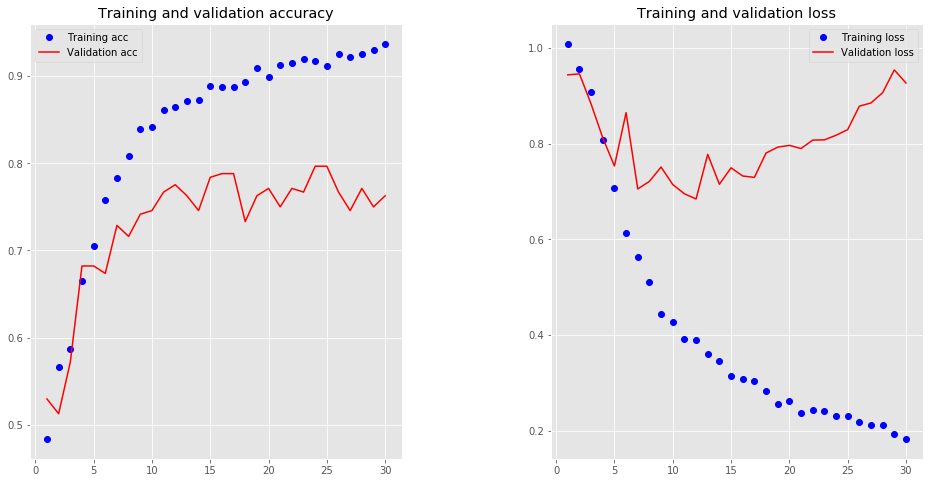

In [29]:
# display results
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig = plt.figure(figsize=(16, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(121)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(122)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
# test a different tweet
twt = ['Meetings: Because none of us is as dumb as all of us.']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt, batch_size=1, verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")
else:
    print("neutral")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 153   5  22   9  30  30  45   5  22]]
negative
